In [5]:
# !pip install pandas
# !pip install openpyxl
# !pip install seaborn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

%matplotlib inline

## Data Preprocessing
Reading, processing and summarizing data

In [7]:
# Reading file and displaying first rows to see the structure of data - USD/PLN
tourists = pd.read_excel('files/tourism.xlsx', sheet_name = 1)
tourists.head()

,Kod,Nazwa,Miesiące,Rodzaje obiektów,Zakres przedmiotowy,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,styczeń,turystyczne obiekty noclegowe ogółem,turyści (korzystający) ogółem,2011,1215786,osoba,
1,0,POLSKA,styczeń,turystyczne obiekty noclegowe ogółem,turyści (korzystający) ogółem,2012,1360960,osoba,
2,0,POLSKA,styczeń,turystyczne obiekty noclegowe ogółem,turyści (korzystający) ogółem,2013,1352509,osoba,
3,0,POLSKA,styczeń,turystyczne obiekty noclegowe ogółem,turyści (korzystający) ogółem,2014,1415184,osoba,
4,0,POLSKA,styczeń,turystyczne obiekty noclegowe ogółem,turyści (korzystający) ogółem,2015,1518140,osoba,


In [8]:
# Viewing columns and their datatypes
tourists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Kod                  168 non-null    int64 
 1   Nazwa                168 non-null    object
 2   Miesiące             168 non-null    object
 3   Rodzaje obiektów     168 non-null    object
 4   Zakres przedmiotowy  168 non-null    object
 5   Rok                  168 non-null    int64 
 6   Wartosc              168 non-null    object
 7   Jednostka miary      168 non-null    object
 8   Atrybut              168 non-null    object
dtypes: int64(2), object(7)
memory usage: 11.9+ KB


In [9]:
# Reading file and displaying first rows to see the structure of data - unemployment
unemployment = pd.read_excel('files/general_unemployment.xlsx', sheet_name = 1)
unemployment.head()

,Kod,Nazwa,Miesiące,Płeć,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,styczeń,ogółem,2011,2104986,osoba,
1,0,POLSKA,styczeń,ogółem,2012,2121518,osoba,
2,0,POLSKA,styczeń,ogółem,2013,2295744,osoba,
3,0,POLSKA,styczeń,ogółem,2014,2260662,osoba,
4,0,POLSKA,styczeń,ogółem,2015,1918599,osoba,


In [10]:
# Viewing columns and their datatypes
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kod              504 non-null    int64 
 1   Nazwa            504 non-null    object
 2   Miesiące         504 non-null    object
 3   Płeć             504 non-null    object
 4   Rok              504 non-null    int64 
 5   Wartosc          504 non-null    object
 6   Jednostka miary  504 non-null    object
 7   Atrybut          504 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.6+ KB


In [11]:
# Preparing month map to create date column
month_mapping = {
    'styczeń' : 1,
    'luty' : 2,
    'marzec' : 3,
    'kwiecień' : 4,
    'maj' : 5,
    'czerwiec' : 6,
    'lipiec' : 7,
    'sierpień' : 8,
    'wrzesień' : 9,
    'październik' : 10,
    'listopad' : 11,
    'grudzień' : 12
}

In [12]:
# Cleaning up data - drop  irrelevant columns
tourists = tourists[tourists['Atrybut'] != 'n']
tourists.drop(['Kod', 'Nazwa', 'Jednostka miary', 'Atrybut', 'Rodzaje obiektów', 'Zakres przedmiotowy'], axis = 1, inplace = True)
tourists.rename(columns={'Zakres przedmiotowy': 'Turysci'}, inplace=True)
tourists.rename(columns={'Wartosc': 'Turysci'}, inplace=True)
# Applying month map and creating date column
tourists['Month'] = tourists['Miesiące'].map(month_mapping)
tourists.rename(columns = {'Rok' : 'Year'}, inplace = True)
tourists['Data'] = pd.to_datetime(tourists[['Year', 'Month']].assign(DAY=1))
tourists['Turysci'] = tourists['Turysci'].astype(int)
# Changing type of number of people to int
tourists.head()

,Miesiące,Year,Turysci,Month,Data
0,styczeń,2011,1215786,1,2011-01-01
1,styczeń,2012,1360960,1,2012-01-01
2,styczeń,2013,1352509,1,2013-01-01
3,styczeń,2014,1415184,1,2014-01-01
4,styczeń,2015,1518140,1,2015-01-01


In [13]:
# Cleaning up data - drop null data and irrelevant columns
unemployment = unemployment[unemployment['Atrybut'] != 'n']
unemployment.drop(['Kod', 'Nazwa', 'Jednostka miary', 'Atrybut'], axis = 1, inplace = True)
unemployment.rename(columns={'Wartosc': 'Osoby'}, inplace=True)
unemployment.head()

,Miesiące,Płeć,Rok,Osoby
0,styczeń,ogółem,2011,2104986
1,styczeń,ogółem,2012,2121518
2,styczeń,ogółem,2013,2295744
3,styczeń,ogółem,2014,2260662
4,styczeń,ogółem,2015,1918599


In [14]:
# Applying month map and creating date column
unemployment['Month'] = unemployment['Miesiące'].map(month_mapping)
unemployment.rename(columns = {'Rok' : 'Year'}, inplace = True)
unemployment['Data'] = pd.to_datetime(unemployment[['Year', 'Month']].assign(DAY=1))

# Changing type of number of people to int
unemployment['Osoby'] = unemployment['Osoby'].astype(int)
unemployment.head()

,Miesiące,Płeć,Year,Osoby,Month,Data
0,styczeń,ogółem,2011,2104986,1,2011-01-01
1,styczeń,ogółem,2012,2121518,1,2012-01-01
2,styczeń,ogółem,2013,2295744,1,2013-01-01
3,styczeń,ogółem,2014,2260662,1,2014-01-01
4,styczeń,ogółem,2015,1918599,1,2015-01-01


## Exploratory Data Analysis (EDA)

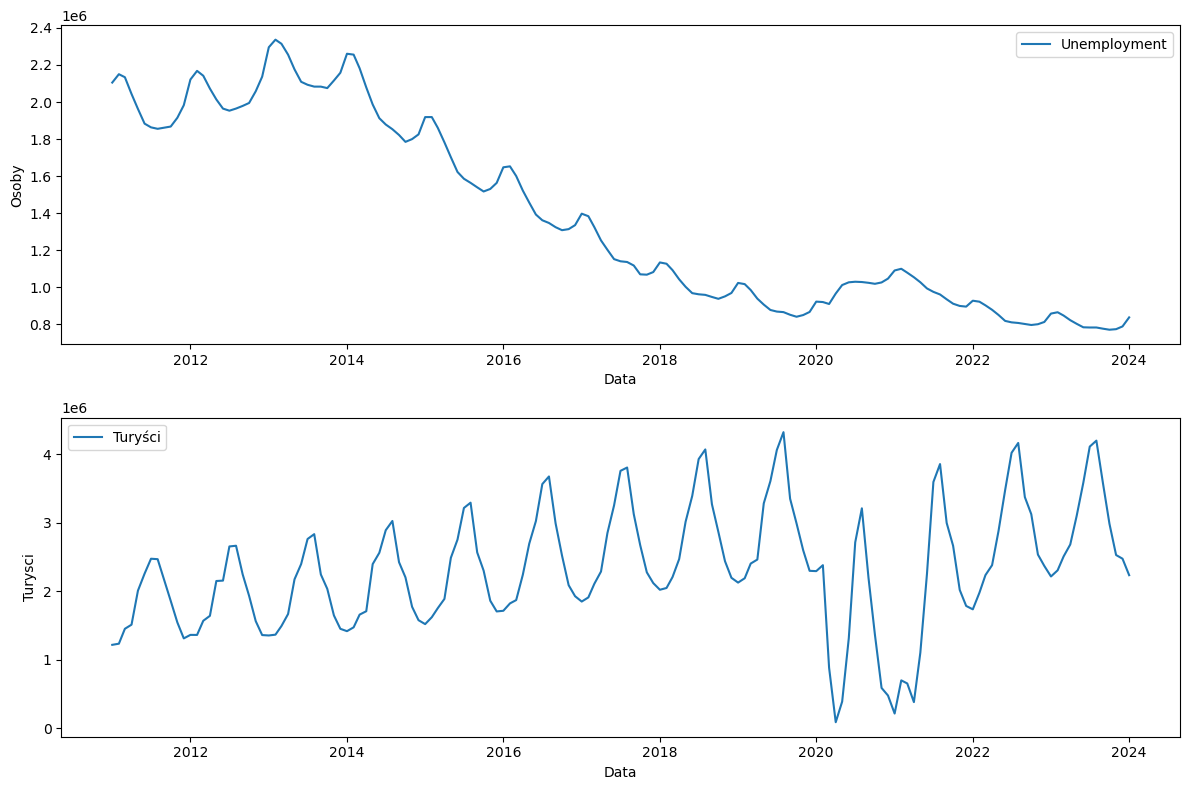

In [15]:
fig = plt.figure(figsize = [12,8])

plt.subplot(2, 1, 1)
sns.lineplot(
    x="Data",
    y="Osoby",
    data=unemployment[unemployment['Płeć'] == "ogółem"],
    label="Unemployment"
)

plt.subplot(2, 1, 2)
sns.lineplot(
    x="Data",
    y="Turysci",
    data=tourists,
    label="Turyści"
)
plt.xlabel("Data")
plt.tight_layout()

plt.legend()

plt.show()

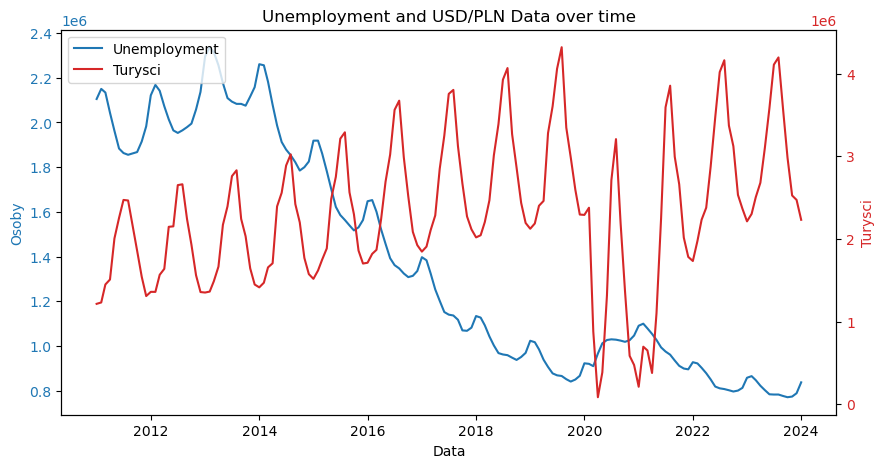

In [16]:
plt.figure(figsize=(10, 5))

# Unemployment data
ax1 = sns.lineplot(
    x="Data",
    y="Osoby",
    data=unemployment[unemployment['Płeć'] == "ogółem"],
    label="Unemployment"
)
ax1.set_xlabel("Data")
ax1.set_ylabel("Osoby", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Currency data
ax2 = ax1.twinx()
sns.lineplot(
    x="Data",
    y="Turysci",
    data=tourists,
    ax=ax2,
    color='tab:red',
    label="Turysci"
)
ax2.set_ylabel("Turysci", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Combining legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Removing duplicate legend
ax2.get_legend().remove()

plt.title("Unemployment and USD/PLN Data over time")
plt.show()

In [20]:
tourists.set_index('Data', inplace=True)
tourists['Turysci'].to_csv('files/tourists_mod.csv')